# はじめに  

機械学習初学者用のチュートリアルとしてこの資料を作ります。
チュートリアル完了後、pythonを使った２項分類の予測モデルを作成し、コンペサイトに投稿できるようになるまでを目標とします。

機械学習では、既存データを学習して未知のデータに対して予測や分類を行うことができます。
しかし、機械学習を勉強しようと参考書を買ってきて読んで見ると謎の数式や記号が並んでいて、線形代数や確率統計に馴染みがない方は
なかなかピンとこないと感じてしまうと思います。
きないことがよくあります。  

一般に機械学習の習得を理論から学び始めるのは難しく時間がかかるものなので、まずはコードを書き実践を通してアルゴリズムの概念やデータの扱い方を把握し、その後にに理論を学ぶと言う順序で学習をするのが効率的だとこれまでの経験から感じています。  

今回、機械学習の実践を行うにあたり、SIGNATEというデータ分析コンペを利用します。
SIGNATEは企業とタイアップして機械学習による予測や分類を行うコンペを定期的に開催するコンペサイトです。上位入賞者には賞金も出ます。
こうしたコンペサイトはデータ分析者にとって自身の腕試しやスキル向上にとても有用で、データ分析の入門者からエキスパートまでたくさん参加者が集まります。

世界的にはグーグルが買収したKaggleという分析コンペサイトが有名です。本当はKaggleをやっていくのがモデル構築のスキルを高めるのに一番良いのですが、英語でとっつきづらくデータサイズも多きめなコンペが多いので、今回はSIGNATEを活用します。

https://signate.jp/

https://www.kaggle.com/

# 銀行の顧客ターゲティング 
予測モデル構築の練習課題として、実データを使った例題を提示します。

本コンペを活用して、SIGNATEでのデータ解析・モデル構築を体験してください。
活用するデータは、実際のビジネス環境で得られたもので、マーケティングキャンペーンの効率化を図るためのモデリングを行います。
詳しくはnoteのDBにあるDS養成講座のレポートを参照ください。

https://signate.jp/competitions/1

いくつか穴埋めにしてあるので(try)と書いてあるところを各自で試してみてください。

## 準備

### コンペ投稿のプロセス
コンペ投稿は以下の手順を繰り返して進めるのが一般的です。
この中でモデルの精度に一番影響を与える工程は、データ前処理です。
どの機械学習アルゴリズムを使う場合でも、そのアルゴリズムに投入するデータの質が精度に大きな影響を与えます。
前処で行う欠損値や外れ値の処理、特徴量作成、変数選択などが一番時間と手間がかかるとこであり、分析者の腕の見せどころとなります。

- データ理解、可視化
- データ前処理
- モデル構築
- 評価
- 予測データ作成
- 投稿

以降、それぞれのプロセスでの実装を記載していきます。

### データのダウンロード
https://signate.jp/competitions/1

上記サイトからtrain,test,sampleそれぞれのデータをダウンロードしてください。
フォルダ構成は以下のようにして、notobookにこのファイルを置き、rawにダウンロードしたデータを配置してください。

 bank  - notebook
 
      |
      
      - raw

### ライブラリのインポート
必要なライブラリをインポートします。asで略称を付けられます。
以下３つのライブラリは、機械学習の実装を行う際の定番ライブラリです。

- numpy：数値計算ライブラリ
- pandas：データ解析ライブラリ
- matplotlib：可視化ライブラリ

%matplotlib inline はjupyternotebook上にグラフを描写するためのものです。

それとセル内のコード実行はshift+Sで出来ます。

In [90]:
# shift+Sでコード実行
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### ファイルの読み込み

In [91]:
#train,test,sample３つのcsvファイルを、pandasのread_csvメソッドを使い「データフレーム」として読み込みます。
train = pd.read_csv('../raw/train.csv')
test = pd.read_csv('../raw/test.csv')
sample = pd.read_csv('../raw/submit_sample.csv',header=None)

### データフレームについて  

データフレームとは、２次元  (行×列)のデータであり、Excelシートのデータのようなものです。  
Python で行列データを取り扱うときは Pandas モジュールのデータフレーム型を利用すると便利です。
各行ごとの平均や列名で列を抽出したりすることが簡単に行えるようになります。

## データ理解
データを読み込みまで終わり、データ内容を理解する前準備が完了しました。
これからダウンロードしたデータの内容を確認します。
データを理解する際は、最初から細部を見るのではなく、大まかな全体像から捉えていくと良いです。

### データフレームの中身確認
データフレーム.head(n)でデータフレームの中身が確認できます。nの数字分行数が表示されます。

In [92]:
# trainの中身確認
train.head(5)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1


In [93]:
# testの中身確認(try)


In [94]:
# sampleの中身確認(try)


３つのファイルの中身を見るとtrainとtestは同じ項目が並んでいるのがわかります。違うのはtrainにはy列があり、testにはy列が無い点です。
このy列が今回のモデルの予測対象＝目的変数となります。
今回のコンペでは、trainを教師データとしてyを予測するモデルを作り、testのyを予測します。基本的にtrainとtestは目的変数以外同じ項目である
必要があります。

sampleは0番目の列がtestデータidとひも付きます。1番目の列がtestデータのyの予測値になります。すでに登録されているデータはコンペサイト側でサンプルとして記載されているデータなので、これから作成するモデルを使って1番目の列を上書きすることになります。sampleはあくまでコンペサイトに投稿するためのフォーマットで、コンペの内容によってこのフォーマットはそれぞれ変わります。

### データフレームの行数と列数を確認 
df.shapeにより、データフレームの行数と列数を確認することができます。

In [95]:
print(train.shape)
print(test.shape)
print(sample.shape)

(27128, 18)
(18083, 17)
(18083, 2)


それぞれ次の行数と列数を持つデータ構造だということがわかります。  

- train:27128行×18列
- test:18083行×17列
- sample:18083行×2列

### 各列の欠損値とデータ型を確認
df.info()により、各列の欠損値の数とデータ型を確認できます。 

In [96]:
# trainの欠損値とデータ型
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27128 entries, 0 to 27127
Data columns (total 18 columns):
id           27128 non-null int64
age          27128 non-null int64
job          27128 non-null object
marital      27128 non-null object
education    27128 non-null object
default      27128 non-null object
balance      27128 non-null int64
housing      27128 non-null object
loan         27128 non-null object
contact      27128 non-null object
day          27128 non-null int64
month        27128 non-null object
duration     27128 non-null int64
campaign     27128 non-null int64
pdays        27128 non-null int64
previous     27128 non-null int64
poutcome     27128 non-null object
y            27128 non-null int64
dtypes: int64(9), object(9)
memory usage: 3.7+ MB


trainには欠損値がなく、int64が9列、object型が9列あることがわかります。testデータも確認してみてください。

In [97]:
# testの欠損値とデータ型(try)


### 基本統計量の確認
df.describe()により、数値データ型の行数・平均値・標準偏差・最小値・最大値・四分位数を確認できます。

In [98]:
# trainの基本統計量の確認
train.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000
mean,13564.500000,40.951010,1355.800870,15.806215,260.711295,2.751769,40.528052,0.579733,0.117001
std,7831.323388,10.608542,3003.305272,8.337904,260.091727,3.126594,100.382462,2.503653,0.321427
min,1.000000,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,6782.750000,33.000000,72.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,13564.500000,39.000000,449.000000,16.000000,182.000000,2.000000,-1.000000,0.000000,0.000000
75%,20346.250000,48.000000,1428.000000,21.000000,323.000000,3.000000,-1.000000,0.000000,0.000000
max,27128.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


ageを見ると平均年齢40歳、標準偏差10、一番下が18歳、最高齢は95歳等がわかります。
その他の列についても気づいたことを書き出して見てください！！

また、数値型以外も表示したいときは、df.describe(include =  'all')と書くと全ての列についての要約統計量を確認できます。

### 気づき(try)


In [99]:
train.describe(include =  'all')

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,27128.000000,27128.000000,27128,27128,27128,27128,27128.000000,27128,27128,27128,27128.000000,27128,27128.000000,27128.000000,27128.000000,27128.000000,27128,27128.000000
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,NaN
freq,NaN,NaN,5886,16411,13882,26644,NaN,15125,22788,17580,NaN,8317,NaN,NaN,NaN,NaN,22150,NaN
mean,13564.500000,40.951010,NaN,NaN,NaN,NaN,1355.800870,NaN,NaN,NaN,15.806215,NaN,260.711295,2.751769,40.528052,0.579733,NaN,0.117001
std,7831.323388,10.608542,NaN,NaN,NaN,NaN,3003.305272,NaN,NaN,NaN,8.337904,NaN,260.091727,3.126594,100.382462,2.503653,NaN,0.321427
min,1.000000,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,0.000000
25%,6782.750000,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,0.000000
50%,13564.500000,39.000000,NaN,NaN,NaN,NaN,449.000000,NaN,NaN,NaN,16.000000,NaN,182.000000,2.000000,-1.000000,0.000000,NaN,0.000000
75%,20346.250000,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,323.000000,3.000000,-1.000000,0.000000,NaN,0.000000


## 可視化
基本統計量でデータの全体像が見えてきたと思いますが、もう少しデータの理解を深めるために可視化を行います。
可視化の方法や切り口はいろいろあり、データの特性を見ながらどういった視点で可視化をするかを探索的に進める必要があります。

In [100]:
# 可視化はMatplotlibが一番定番なんですがMatplotlibの機能をより美しく、
# より簡単に実現するためのラッパーライブラリの「Seaborn」を使います。
# importでエラーがでたら、anacondaplomptで"pip install seaborn"を実行してください。
import seaborn as sns

### 定額預金申込有無

([<matplotlib.axis.XTick at 0x253bc8c6048>,
 <a list of 2 Text xticklabel objects>)

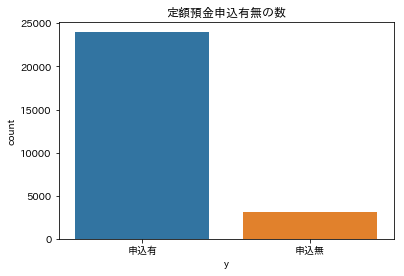

In [101]:
# 定額預金申込有無の数
# 引数にx軸を定義するとデータ数を表示できます。これだけでプロットできます
sns.countplot(train.y)
# タイトルの設定
plt.title('定額預金申込有無の数')
# x軸のラベルを指定
plt.xticks([0,1],['申込有','申込無'])

### 年齢

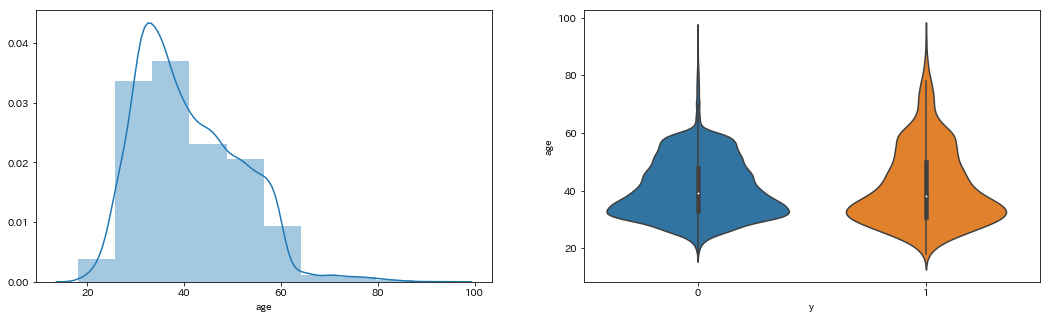

In [102]:
# 画像サイズを指定
plt.figure(figsize=(18, 5))
# 画像を左右に並べる：subplot(行数, 列数, 何番目のプロットか)
plt.subplot(1, 2, 1)
# ヒストグラムで年齢をプロット binsはx軸の刻み目の指定
sns.distplot(train.age, bins=10)
# 画像を左右に並べる：subplot(行数, 列数, 何番目のプロットか)
plt.subplot(1, 2, 2)
# 申込有無毎の年齢分布をバイオリン図をプロット
sns.violinplot(x='y', y='age', data=train)

### 職種

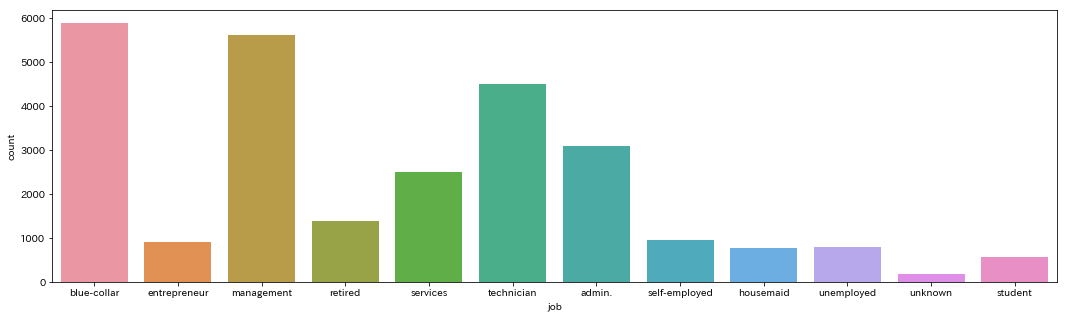

In [103]:
# 画像サイズを指定
plt.figure(figsize=(18, 5))
# 職種毎のデータ数をカウント
sns.countplot(train.job)

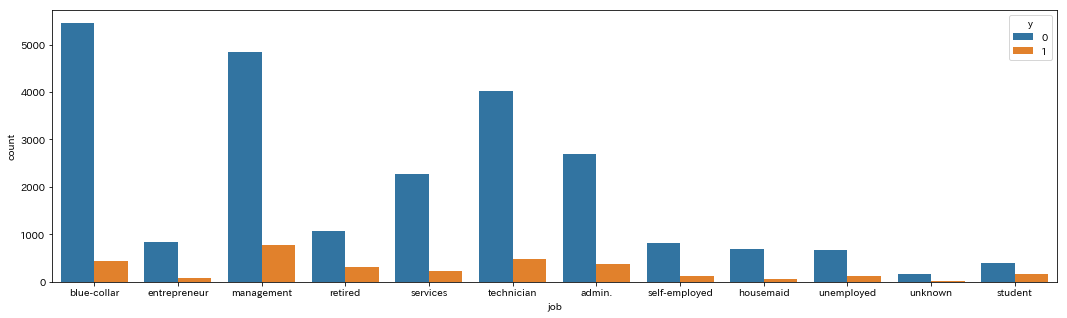

In [104]:
# 画像サイズを指定
plt.figure(figsize=(18, 5))
# 職種別に申込有無を表示
sns.countplot(x='job', hue='y', data=train)

### 全体の相関

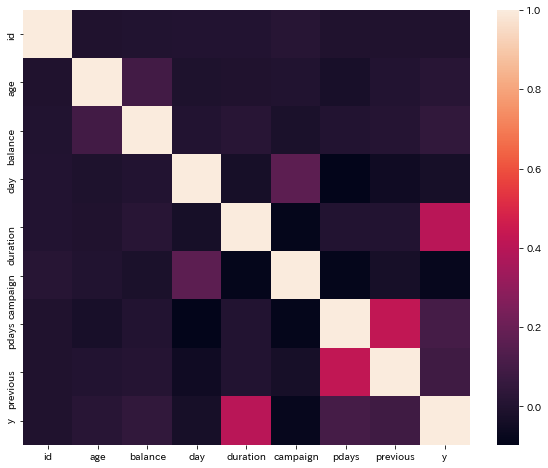

In [105]:
# 画像サイズを指定
plt.figure(figsize=(10, 8))
# ヒートマップ
sns.heatmap(train.corr())

いくつかの項目について可視化を行いました。申し込む人と申し込まない人の傾向がいくつか見えてくると思うので、気づいた点を書き出してみてください。
また、その他の項目についてもseabornの使い方を調べながら可視化を進めてください。他にもいろいろなグラグを書くことができます！

In [ ]:
# その他の項目の可視化(try)


### 気づき(try)


## データ前処理
前処理(Preprocessing)とは、与えられたデータについてアルゴリズムを用いて予測ができる形にするまでの処理を意味します。
具体的には、欠損値への対応、外れ値の検出・処理、ダミー変数の作成、連続データの離散化、特徴量選択などを行います。  
適用するアルゴリズムにより、異なる前処理をしなければならないことがあるので、
何度も前処理をやり直す必要があるなど、データ分析を行うにあたりかなり時間がかかる作業です。

In [106]:
# 一旦飛ばします！先にモデル構築を体験していただきます！

## モデル構築
ここでようやく、機械学習によるモデルの構築を行います。
今回は決定木というアルゴリズムを使ってモデルを構築します。
決定木とは何かというのは、とりあえず一旦気にしないで、まずは実装してみます。

In [115]:
# 学習に使うデータを用意
# (pramに設定する変数を増やしたり減らしたりしてモデルをいくつかモデルを作って投稿してみてください)
pram = ['age','balance','pdays']
# trainとtestから学習に必要な項目を引き出します
train_X = train.loc[:,pram]
test_X = test.loc[:,pram]
# trainのyをコピーします
train_y = train['y']

In [116]:
## sklearn（機械学習ライブラリ）のインポート
from sklearn.tree import DecisionTreeClassifier

# パラメータ設定
clf = DecisionTreeClassifier(random_state=0)
# モデル構築
clf = clf.fit(train_X, train_y)

# 設定できるパラメータは、例えば以下の様なものです。（いろいろ設定してみてください）
# criterion : 分割基準。gini or entropyを選択。(デフォルトでジニ係数)
# max_depth : 木の深さ。木が深くなるほど過学習し易いので、適当なしきい値を設定してあげる。
# max_features：最適な分割をする際の特徴量の数
# min_samples_split：分岐する際のサンプル数
# random_state：ランダムseedの設定。seedを設定しないと、毎回モデル結果が変わるので注意。

clf変数が予測モデルになります。
この予測モデルに対してtestデータを当てて、testデータのy：申込有無を予測します。

In [121]:
# 予測
pred = clf.predict(test_X)

予測した値を提出用のデータとして加工します。
ここでsampleファイルを利用します。sampleファイルに対してpredの値を上書きします。

In [124]:
# 提出用
sample[1] = pred
sample.to_csv('submit_bank_DecisionTree_20180929.csv',index=None,header=None)

フォルダ内にcsvファイルが出力されていることを確認してください。
そのファイルをSIGNATEに投稿して、評価値とランキングをslackに投稿してみてください！！(try)

https://signate.jp/competitions/1

これで一通りのプロセスを体験できました。
今後モデルの精度を向上するための方法や評価指標の確認などを追加していきます。。